FIRST ASSIGNMENT OF ENERJISA & PATIKA BOOTCAMP
* [Create Dataframe with Pandas](#1)
* [Part of Describe and Quartile](#2)
* [Corr & Cov & Pearson & Spearman Rank & Effect Size'](#3)
* [Real Life Example of Bayes ](#4)
* [Similarities and differences of distributions](#5)
                                                  

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import scipy
import warnings
warnings.filterwarnings("ignore")

<a name="1"></a>
# BİRİNCİ SORU


Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [113]:
# This dataframe is inspired by archery, We'll investigate the types of arches

# Nominal As "Name of Arches"
nominal = ['Hoyt','Winners','Win&Win','Samick','MK_Korea']

# Ordinal As "Type of Arches"
ordinal = ['wood','iron','roller']

# Interval As "Created Year of Arches"
interval = np.arange(2010,2021)

# Ratio As "Lenght of Arches Stem"
ratio = np.arange(21, 26)

# They're the contents of the dataframe will be randomly generated
archNominal = []
archOrdinal = []
archInterval = []
archRatio  = []


for i in range(100):
  archNominal.append(nominal[np.random.randint(len(nominal))])
  archOrdinal.append(ordinal[np.random.randint(len(ordinal))])
  archInterval.append(interval[np.random.randint(len(interval))])
  archRatio.append(ratio[np.random.randint(len(ratio))])
#print(archOrdinal)

dataFrame = pd.DataFrame({'Brand': archNominal, 'Type': archOrdinal, 'Created Year': archInterval, 'Lenght of Stem': archRatio})
dataFrame.head(15)

,Brand,Type,Created Year,Lenght of Stem
0,Win&Win,iron,2020,23
1,Samick,iron,2020,21
2,Samick,iron,2015,24
3,Winners,wood,2014,25
4,Hoyt,roller,2018,23
5,Samick,wood,2015,24
6,Hoyt,roller,2014,22
7,MK_Korea,iron,2011,25
8,Win&Win,roller,2015,25
9,Samick,wood,2010,24


****
<a name="2"></a>
# İKİNCİ SORU

Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.

In [114]:
#Getting data from pc
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

Saving data.csv to data (4).csv


In [115]:
#Quick Look Data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [116]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:



```
Should've Dropped unnamed colon..
```



In [117]:
data.describe()[["radius_mean","area_mean","compactness_mean"]].T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454




```
radius_mean

* medyan < ortalama olduğu gözlenmektedir.
* medyan değerleri birbirine oldukça yakın gözlenlenmektedir.
* Sağa çarpık bir dağılıma sahip olabilir.
* Standart sapma değeri çok büyük gözlenmektedir
```





```
area_mean

* veri kümesiuç değerler barındırıyor olabilir,
* medyan < ortalama ve standart sapması büyüktür,
* veri kümesinin dağılımı sağa çarpık olabilir.
```



```
compactness_mean

* medyan < ortalama olduğu gözlenmektedir, 
* standart sapma değeri küçüktür,
* sağa çarpık bir dağılıma sahip olabilir.
```

In [118]:
# Create Function For Founding Quartiles
def detect_outliers(data, column):
 
    global cleaned_data
    global outliers

    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)

    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR  
    lower = Q1 - 1.5 * IQR
    
    outliers = [i for i in data[column] if ((i > lower) & (i < upper))]
    print('-'*80)
    print(column, 'için outlier veri sayısı :', len(data) - len(outliers))
    
    cleaned_data = data.loc[data[column].isin(outliers)]

In [119]:
# Implement Function
for i in ["radius_mean","area_mean","compactness_mean"]:
    detect_outliers(data, i)
print('-'*80)

--------------------------------------------------------------------------------
radius_mean için outlier veri sayısı : 14
--------------------------------------------------------------------------------
area_mean için outlier veri sayısı : 25
--------------------------------------------------------------------------------
compactness_mean için outlier veri sayısı : 16
--------------------------------------------------------------------------------


In [120]:
# Let's See What We Have
print('\n','-'*100)
print('\nVeri setimizin ilk halinin istatistik sonuçları:\n')
print(data.describe())
print('\n','-'*80)
print('\nOutliers değerlerin filtrelenmesi sonucu istatistik sonuçları :\n')
print(filtered_data.describe())
print('\n','-'*100)


 ----------------------------------------------------------------------------------------------------

Veri setimizin ilk halinin istatistik sonuçları:

                 id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]

 --------------------------------------------------------------------------------

Outliers değerlerin filtrelenmesi sonucu istatistik son

****
<a name="3"></a>
# ÜÇÜNCÜ SORU

 Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

In [121]:
triple_data = data[["radius_mean","area_mean","compactness_mean"]]
triple_data.head()

,radius_mean,area_mean,compactness_mean
0,17.99,1001.0,0.27760
1,20.57,1326.0,0.07864
2,19.69,1203.0,0.15990
3,11.42,386.1,0.28390
4,20.29,1297.0,0.13280


-->Korelasyon

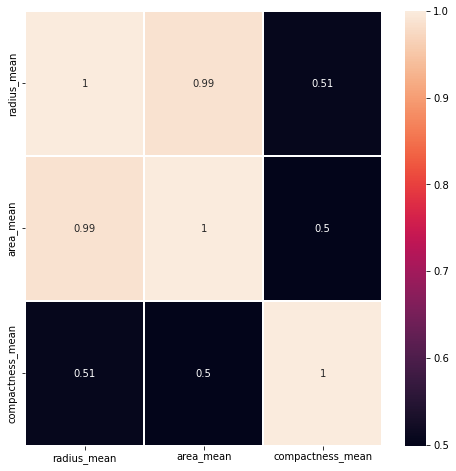

In [122]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(triple_data.corr(), annot=True, linewidths=0.5,linecolor="white",ax=ax)
#sns.heatmap(triple_data.corr(), annot=True, linewidths=0.5,fmt= '.1f',linecolor="white",ax=ax)
plt.show()



```
* "radius_mean" & "area_mean": Güçlü bir pozitif ilişki var. (Fizik kurallarına göre öyle olması beklenir.)
* "radius_mean" & "compactness_mean": Pozitif ve orta seviyeli bir ilişki vardır.
* "area_mean" & "compactness_mean": Pozitif ve orta seviyeli bir ilişki bulunmaktadır.
```



***
--> Kovaryans

In [123]:
covariance_matrix = triple_data.cov()/10
covariance_matrix

,radius_mean,area_mean,compactness_mean
radius_mean,1.241892,122.448341,0.009420
area_mean,122.448341,12384.355432,0.926493
compactness_mean,0.009420,0.926493,0.000279




```
* "radius_mean" & "area_mean": Pozitif ilişki var.
* "radius_mean" & "compactness_mean": Pozitif bir ilişki vardır.
* "area_mean" & "compactness_mean": Pozitif bir ilişki bulunmaktadır.
```



***
--> Pearson

In [124]:
from scipy.stats import pearsonr

corr0,_ = pearsonr(data["radius_mean"],data["area_mean"])
corr1,_ = pearsonr(data["radius_mean"],data["compactness_mean"])
corr2,_ = pearsonr(data["area_mean"],data["compactness_mean"])

print("Radius_mean & area_mean Corr:" , corr0)
print("Radius_mean & compactness_mean Corr:" , corr1)
print("Area_mean & compactness_mean Corr:" , corr2)

Radius_mean & area_mean Corr: 0.9873571700566125
Radius_mean & compactness_mean Corr: 0.5061235775263633
Area_mean & compactness_mean Corr: 0.49850168215241175




```
* "radius_mean" & "area_mean": Güçlü bir ilişki var.
* "area_mean" & "compactness_mean": Zayıf bir ilişki bulunmaktadır.
```



***
--> Spearman 

In [125]:
from scipy.stats import spearmanr

spearman0,_ = spearmanr(data["radius_mean"],data["area_mean"])
spearman1,_ = spearmanr(data["radius_mean"],data["compactness_mean"])
spearman2,_ = spearmanr(data["area_mean"],data["compactness_mean"])

print("Radius_mean & area_mean Corr:" , spearman0)
print("Radius_mean & compactness_mean Corr:" , spearman1)
print("Area_mean & compactness_mean Corr:" , spearman2)

Radius_mean & area_mean Corr: 0.9996020278067481
Radius_mean & compactness_mean Corr: 0.49757760995795647
Area_mean & compactness_mean Corr: 0.4889883974982949




```
* "radius_mean" & "area_mean": Güçlü bir pozitif ilişki var.
* "radius_mean" & "compactness_mean": Pozitif ve zayıf bir ilişki vardır.
* "area_mean" & "compactness_mean": Pozitif ve zayıf bir ilişki bulunmaktadır.
```



***
---> Effect Size

In [ ]:
! pip install pingouin

In [132]:
import pingouin as pg

effect0 = pg.compute_effsize(data["radius_mean"],data["area_mean"],eftype='cohen')
effect1 = pg.compute_effsize(data["radius_mean"],data["compactness_mean"],eftype='cohen')
effect2 = pg.compute_effsize(data["area_mean"],data["compactness_mean"],eftype='cohen')

print("Radius_mean & area_mean Cohen:" , effect0)
print("Radius_mean & compactness_mean Cohen:" , effect1)
print("Area_mean & compactness_mean Cohen:" , effect2)

Radius_mean & area_mean Cohen: -2.5748571535813936
Radius_mean & compactness_mean Cohen: 5.626829112228556
Area_mean & compactness_mean Cohen: 2.6313393087695855




```
* Değerler çok yüksek çıkmıştır. Kolonlar arasındaki ortalama farkların, 1 hatta 2 standart sapmadan daha uzak olması; farklılığın bir göstergesidir.
```



****
<a name="4"></a>
# DÖRDÜNCÜ SORU

Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

* Örnek1: Spam olduğu kabul edilen 2000 mesajın 250'sinde ve spam olarak görünmeyen 1000 mesajın 5'inde 'Rolex' kelimesini bulduğumuzu kabul edelim. 'Rolex' kelimesini içeren bir mesajın spam olma olasılığı Bayes Spam Filtreleri kullanılarak hesaplanabilir.



```
* Örnek2: Yeni ilaç ve yeni bir uyuşturucu madde testinin değerlendirilmesinde de Bayes teoremi kullanılabilir
```



* Örnek3: 100.000 kişide bir görülen nadir bir hastalık için yapılan bir testin rastgele kişiler seçildiğinde,hasta olan kişiler için doğruluğu %99 ve hasta olmayanlar için doğruluğu %99.5 ise bu bilgiler ışığında bir kişinin hasta veya pozitif testli olma olasılığı hesaplanabilir.



```
* Örnek4: Yağmur yağma durumu fıskiyenin çalışma olasılığını etkiler. Çimlerin ıslak olma olasılığı ise hem fıskiyeye hem de yağmura bağlıdır.
```



* Örnek5: 80 yaşının üzerindeki yaşlıların yüksekten düşerek ölme olasılığı Bayes Teoremi kullanılarak hesaplanabilir.

****
<a name="5"></a>
# BEŞİNCİ SORU

Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.

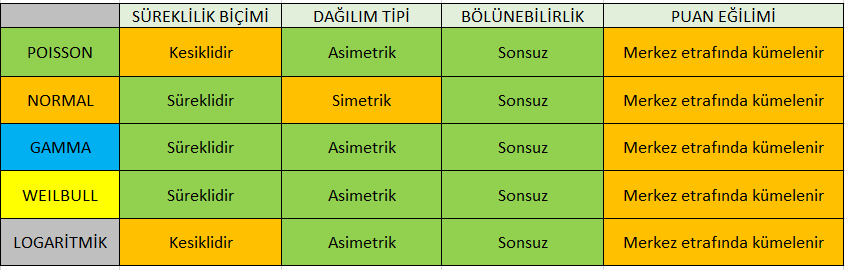

****

